In [5]:
%matplotlib inline
%pylab inline
import cv2
import matplotlib.pyplot as plt
import copy 
import numpy as np

pylab.rcParams['figure.figsize'] = (10, 10)

Populating the interactive namespace from numpy and matplotlib


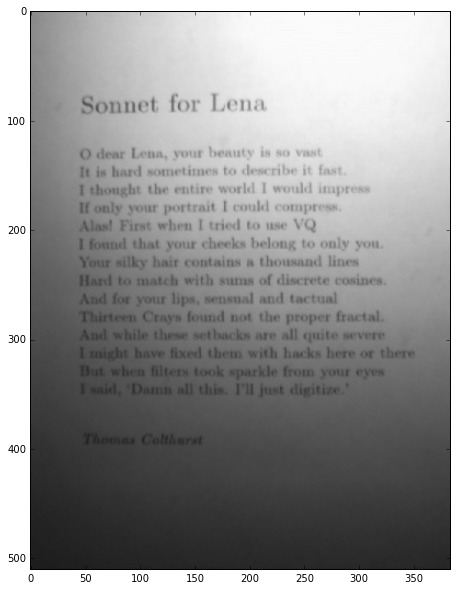

In [2]:
img_rgb = cv2.imread('sonet.jpg', 1)
plt.imshow(img_rgb)
plt.show()

In [7]:
img_ycrcb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCR_CB)

In [8]:
Y_blurred = cv2.GaussianBlur(img_ycrcb[:, :, 0], (5, 5), 0)

In [9]:
import math

Y = img_ycrcb[:, :, 0]
log_ratio = np.vectorize(math.log)(np.vectorize(float)(Y) / Y_blurred)

In [10]:
def to_255(img):
    y_max = img.max()
    y_min = img.min()
    f = np.vectorize(lambda y: int((y - y_min) * 255 / (y_max - y_min)))
    return f(img)

In [11]:
log_ratio_255 = to_255(log_ratio)

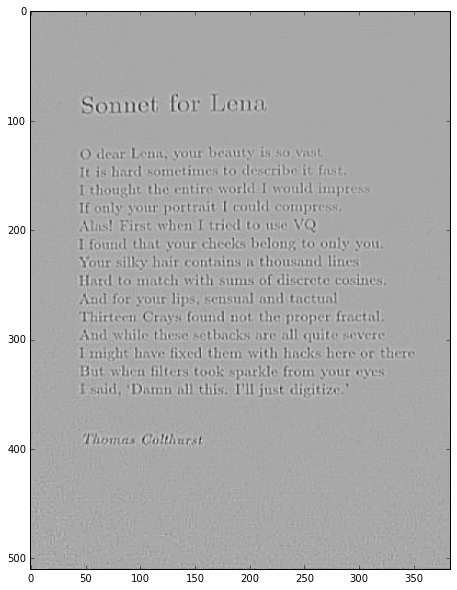

In [13]:
log_copy = img_ycrcb.copy()
log_copy[: ,: , 0] = log_ratio_255
log_img = cv2.cvtColor(log_copy, cv2.COLOR_YCrCb2RGB)
plt.imshow(log_img)

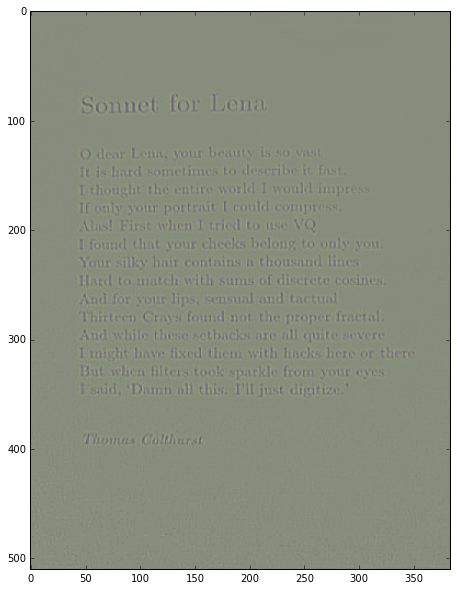

In [14]:
ratio = np.vectorize(float)(Y) / Y_blurred
ratio_255 = to_255(ratio)
linear_copy = img_ycrcb.copy()
linear_copy[: ,: , 0] = ratio_255
linear_img = cv2.cvtColor(linear_copy, cv2.COLOR_RGB2YCR_CB)
plt.imshow(linear_img)

Гауссовский фильтр дает более приемлемое визуальное качество. Это можно объяснить, что веса пикселей из окрестности дают не всегда равномерный вклад в значение яркости пикселя в центре.  

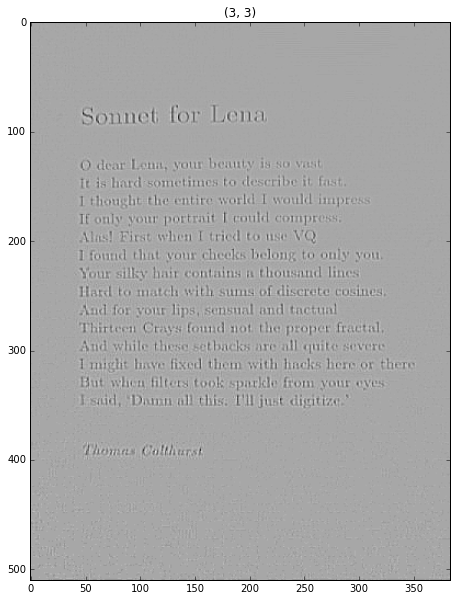

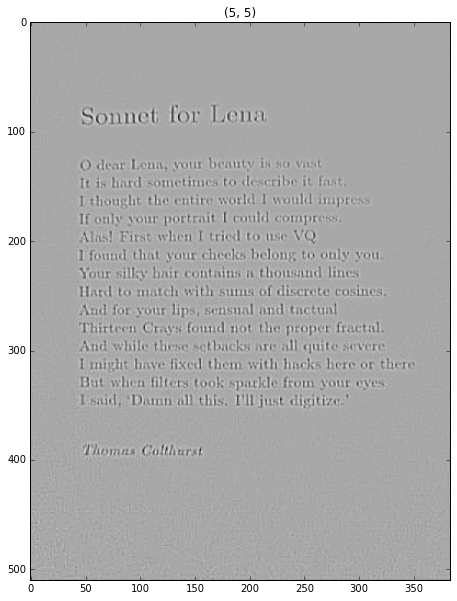

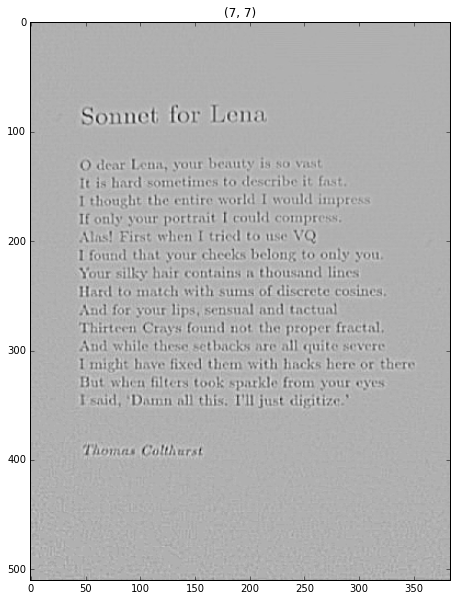

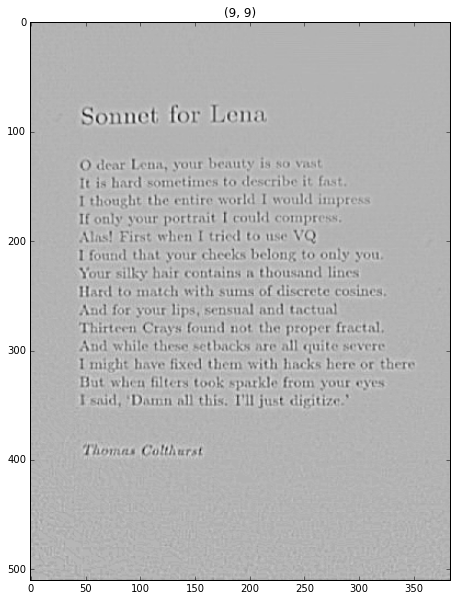

In [22]:
k_sizes = [(i, i) for i in xrange(3, 10, 2)]

for k_size in k_sizes:
    plt.figure()
    Y_blurred = cv2.GaussianBlur(img_ycrcb[:, :, 0], k_size, 0)
    Y = img_ycrcb[:, :, 0]
    log_ratio = np.vectorize(math.log)(np.vectorize(float)(Y) / Y_blurred)
    log_ratio_255 = to_255(log_ratio)
    log_copy = img_ycrcb.copy()
    log_copy[: ,: , 0] = log_ratio_255
    log_img = cv2.cvtColor(log_copy, cv2.COLOR_YCrCb2RGB)
    plt.title(str(k_size))
    plt.imshow(log_img)

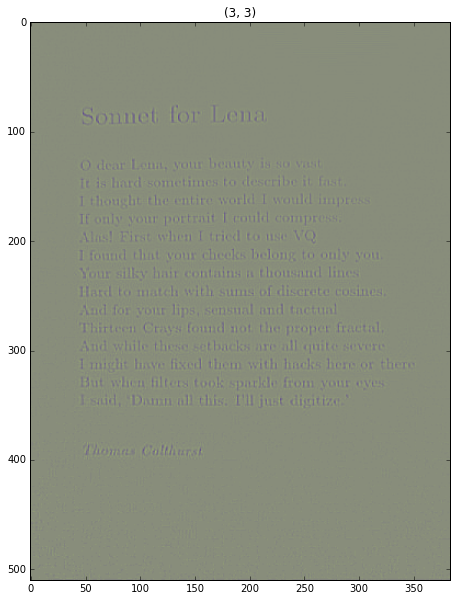

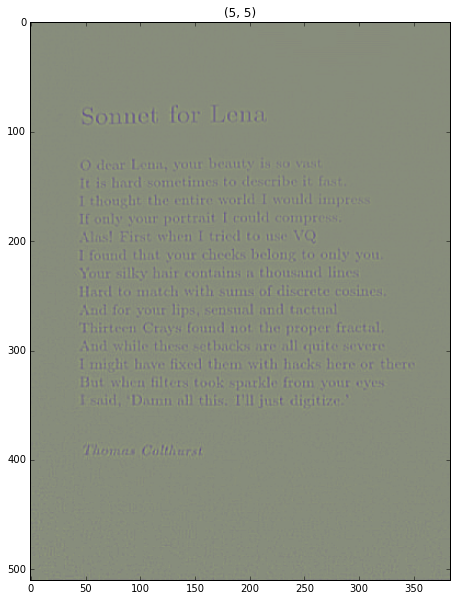

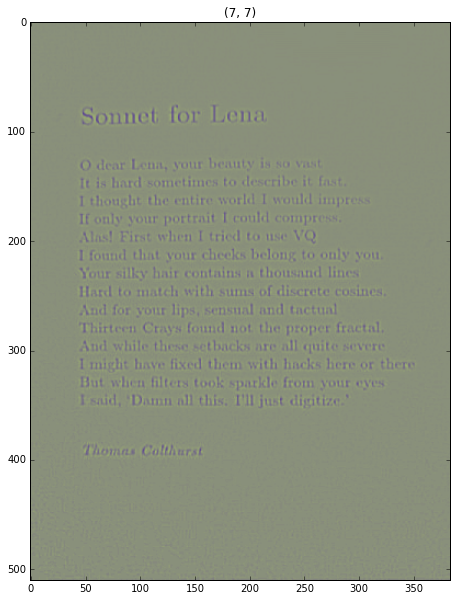

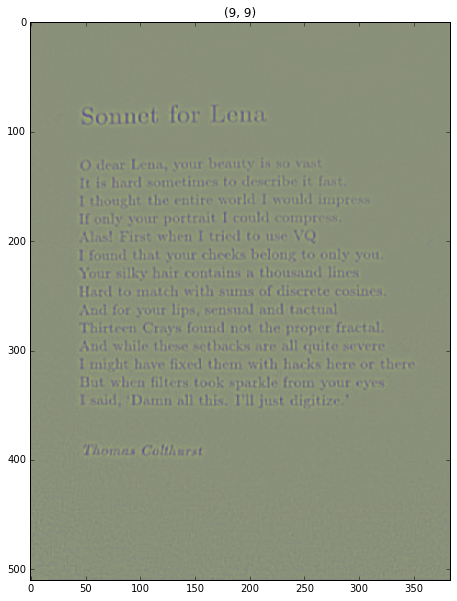

In [25]:
for k_size in k_sizes:
    plt.figure()
    Y_blurred = cv2.GaussianBlur(img_ycrcb[:, :, 0], k_size, 0)
    Y = img_ycrcb[:, :, 0]
    ratio = np.vectorize(float)(Y) / Y_blurred
    ratio_255 = to_255(ratio)
    linear_copy = img_ycrcb.copy()
    linear_copy[: ,: , 0] = ratio_255
    linear_img = cv2.cvtColor(linear_copy, cv2.COLOR_RGB2YCR_CB)
    plt.title(str(k_size))
    plt.imshow(linear_img)

Оптимальные значения размеры ядра для гауссовского фильтра - 5 на 5, для линейного фильтра - 7 на 7. 